  Property ID  Property Size (X1)  Location Score (X2)  Price (Y)  Variance  \
0           A                1500                    8     500000  4.711470   
1           B                2000                    6     600000  4.953032   
2           C                1200                    9     450000  4.481689   
3           D                2500                    7     700000  7.028688   
4           E                1800                    5     550000  4.055200   

     Weight  
0  0.212248  
1  0.201897  
2  0.223130  
3  0.142274  
4  0.246597  


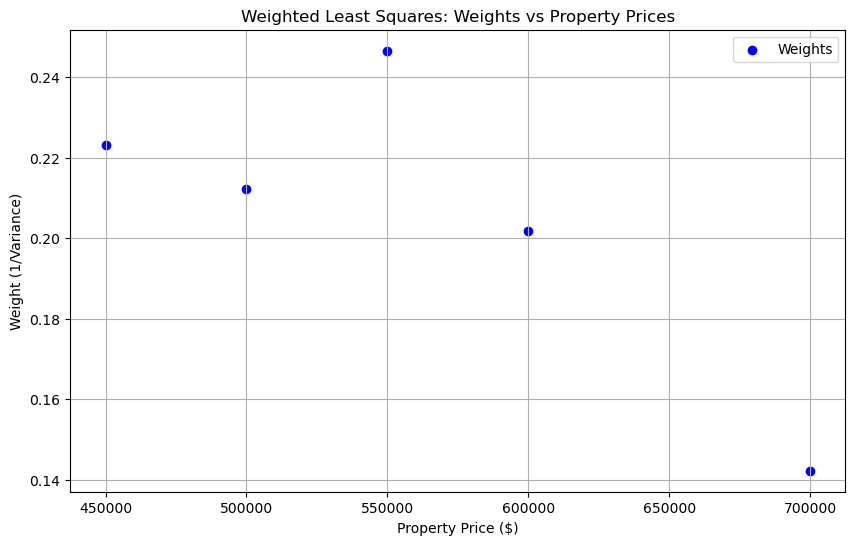

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the dataset
data = {
    'Property ID': ['A', 'B', 'C', 'D', 'E'],
    'Property Size (X1)': [1500, 2000, 1200, 2500, 1800],
    'Location Score (X2)': [8, 6, 9, 7, 5],
    'Price (Y)': [500000, 600000, 450000, 700000, 550000]
}
df = pd.DataFrame(data)

# Parameters for the variance model
sigma_0_squared = 1.0  # Base variance (assumed)
alpha = 0  # Assumed constant
beta_1 = 0.0005  # Effect of property size
beta_2 = 0.1     # Effect of location score

# Calculate variances and weights
df['Variance'] = sigma_0_squared * np.exp(alpha + beta_1 * df['Property Size (X1)'] + beta_2 * df['Location Score (X2)'])
df['Weight'] = 1 / df['Variance']

# Print the DataFrame with calculated Variances and Weights 
print(df[['Property ID', 'Property Size (X1)', 'Location Score (X2)', 'Price (Y)', 'Variance', 'Weight']])

# Plot the weights vs prices
plt.figure(figsize=(10, 6))
plt.scatter(df['Price (Y)'], df['Weight'], color='blue', label='Weights')
plt.xlabel('Property Price ($)')
plt.ylabel('Weight (1/Variance)')
plt.title('Weighted Least Squares: Weights vs Property Prices')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\anmol\AppData\Local\Temp\ipykernel_31728\2694593313.py:24: RuntimeWarning: divide by zero encountered in divide
  d_alpha = np.sum((1 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))
C:\Users\anmol\AppData\Local\Temp\ipykernel_31728\2694593313.py:27: RuntimeWarning: divide by zero encountered in divide
  d_beta_1 = np.sum((x1 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))
C:\Users\anmol\AppData\Local\Temp\ipykernel_31728\2694593313.py:30: RuntimeWarning: divide by zero encountered in divide
  d_beta_2 = np.sum((x2 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))


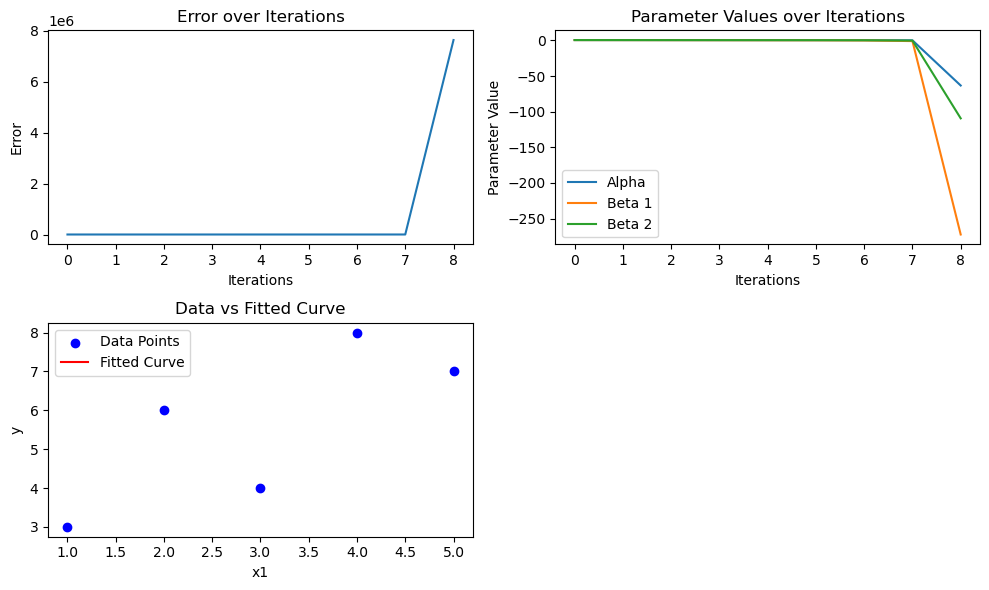

Final alpha: -inf
Final beta_1: -inf
Final beta_2: -inf


In [2]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.array([1, 2, 3, 4, 5]) 
x2 = np.array([5, 4, 3, 2, 1]) 
y = np.array([3, 6, 4, 8, 7])  
sigma_o = 0.5 


alpha = 0.5
beta_1 = 0.5
beta_2 = 0.5


learning_rate = 0.01
iterations = 1000


def compute_sum(alpha, beta_1, beta_2, x1, x2, y, sigma_o):
    sigma_i = sigma_o * np.exp(alpha + beta_1 * x1 + beta_2 * x2)
    
    # Derivative with respect to alpha
    d_alpha = np.sum((1 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))
    
    # Derivative with respect to beta_1
    d_beta_1 = np.sum((x1 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))
    
    # Derivative with respect to beta_2
    d_beta_2 = np.sum((x2 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))
    
    return d_alpha, d_beta_1, d_beta_2

# Gradient Descent to minimize the sum
alpha_values = []
beta_1_values = []
beta_2_values = []
error_values = []

for _ in range(iterations):
    d_alpha, d_beta_1, d_beta_2 = compute_sum(alpha, beta_1, beta_2, x1, x2, y, sigma_o)
    
    # Update parameters using gradient descent
    alpha -= learning_rate * d_alpha
    beta_1 -= learning_rate * d_beta_1
    beta_2 -= learning_rate * d_beta_2
    
    # Store the parameter values and error for plotting
    alpha_values.append(alpha)
    beta_1_values.append(beta_1)
    beta_2_values.append(beta_2)
    error_values.append(np.sum((y - alpha - beta_1 * x1 - beta_2 * x2)**2))
+
# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting error vs iterations
plt.subplot(2, 2, 1)
plt.plot(error_values)
plt.title('Error over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Error')

# Plotting alpha, beta_1, and beta_2 over iterations
plt.subplot(2, 2, 2)
plt.plot(alpha_values, label='Alpha')
plt.plot(beta_1_values, label='Beta 1')
plt.plot(beta_2_values, label='Beta 2')
plt.title('Parameter Values over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.legend()

# Plotting the final fitted curve
plt.subplot(2, 2, 3)
plt.scatter(x1, y, color='blue', label='Data Points')
plt.plot(x1, alpha + beta_1 * x1 + beta_2 * x2, color='red', label='Fitted Curve')
plt.title('Data vs Fitted Curve')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Final values for alpha, beta_1, and beta_2
print(f"Final alpha: {alpha}")
print(f"Final beta_1: {beta_1}")
print(f"Final beta_2: {beta_2}")


C:\Users\anmol\AppData\Local\Temp\ipykernel_31728\1556216577.py:55: RuntimeWarning: overflow encountered in square
  error_values.append(np.sum((y - alpha - beta_1 * x1 - beta_2 * x2)**2))
C:\Users\anmol\AppData\Local\Temp\ipykernel_31728\1556216577.py:27: RuntimeWarning: overflow encountered in multiply
  d_alpha = np.sum((1 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))
C:\Users\anmol\AppData\Local\Temp\ipykernel_31728\1556216577.py:30: RuntimeWarning: overflow encountered in multiply
  d_beta_1 = np.sum((x1 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))
C:\Users\anmol\AppData\Local\Temp\ipykernel_31728\1556216577.py:33: RuntimeWarning: overflow encountered in multiply
  d_beta_2 = np.sum((x2 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))


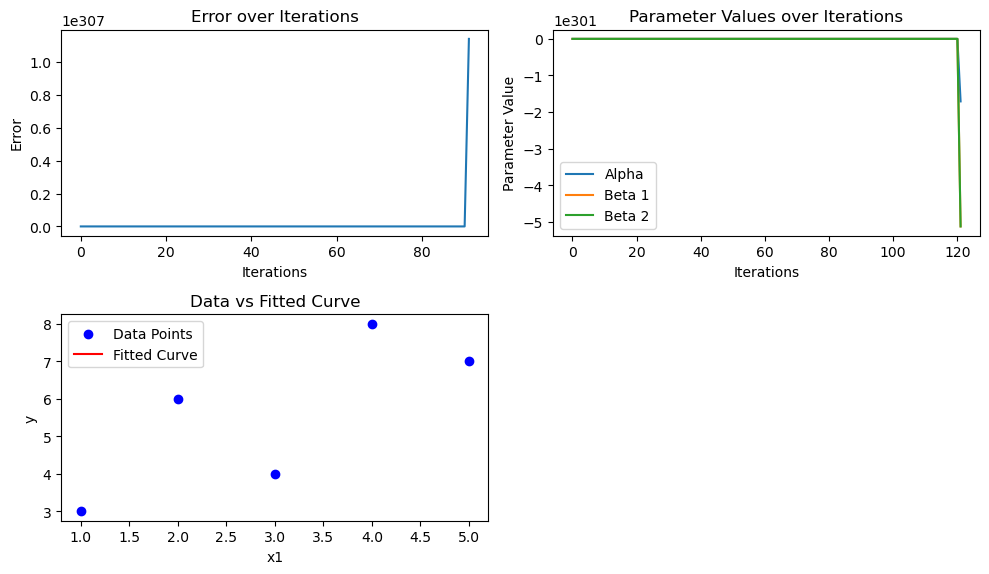

Final alpha: -inf
Final beta_1: -inf
Final beta_2: -inf


In [3]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.array([1, 2, 3, 4, 5]) 
x2 = np.array([5, 4, 3, 2, 1])  
y = np.array([3, 6, 4, 8, 7]) 
sigma_o = 

# Initialize alpha, beta1, beta2
alpha = 0.5
beta_1 = 0.5
beta_2 = 0.5


learning_rate = 0.001  
iterations = 1000


def compute_sum(alpha, beta_1, beta_2, x1, x2, y, sigma_o):
    sigma_i = sigma_o * np.exp(alpha + beta_1 * x1 + beta_2 * x2)
    
    # Ensure no zero division by setting a minimum sigma_i value
    sigma_i = np.maximum(sigma_i, 1e-6)  # Prevent division by zero

    # Derivative with respect to alpha
    d_alpha = np.sum((1 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))
    
    # Derivative with respect to beta_1
    d_beta_1 = np.sum((x1 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))
    
    # Derivative with respect to beta_2
    d_beta_2 = np.sum((x2 / sigma_i) * (y - alpha - beta_1 * x1 - beta_2 * x2))
    
    return d_alpha, d_beta_1, d_beta_2

alpha_values = []
beta_1_values = []
beta_2_values = []
error_values = []

for _ in range(iterations):
    d_alpha, d_beta_1, d_beta_2 = compute_sum(alpha, beta_1, beta_2, x1, x2, y, sigma_o)
    
    # Update parameters using gradient descent
    alpha -= learning_rate * d_alpha
    beta_1 -= learning_rate * d_beta_1
    beta_2 -= learning_rate * d_beta_2
    
    # Store the parameter values and error for plotting
    alpha_values.append(alpha)
    beta_1_values.append(beta_1)
    beta_2_values.append(beta_2)
    error_values.append(np.sum((y - alpha - beta_1 * x1 - beta_2 * x2)**2))

# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting error vs iterations
plt.subplot(2, 2, 1)
plt.plot(error_values)
plt.title('Error over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Error')

# Plotting alpha, beta_1, and beta_2 over iterations
plt.subplot(2, 2, 2)
plt.plot(alpha_values, label='Alpha')
plt.plot(beta_1_values, label='Beta 1')
plt.plot(beta_2_values, label='Beta 2')
plt.title('Parameter Values over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.legend()

# Plotting the final fitted curve
plt.subplot(2, 2, 3)
plt.scatter(x1, y, color='blue', label='Data Points')
plt.plot(x1, alpha + beta_1 * x1 + beta_2 * x2, color='red', label='Fitted Curve')
plt.title('Data vs Fitted Curve')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Final values for alpha, beta_1, and beta_2
print(f"Final alpha: {alpha}")
print(f"Final beta_1: {beta_1}")
print(f"Final beta_2: {beta_2}")
